# *Wine Quality Dataset*
O repositório foi escolhido por estes motivos:
1. Output claro: a variável ``quality`` já vem bem definida (valores de 0 à 10);
2. Problema flexível: é facilmente aplicável numa regressão para prever a qualidade, mas também para classificação entre vinho tinto e vinho branco!
3. Variáveis independentes: variáveis contínuas que, à primeira vista, aparentam não terem grandes correlações de um ponto de vista **lógico**, o que é bom para regressões.
4. Dataset **real** e moderadamente limpo, sem valores ausentes segundo o website.
5. Dataset de tamanho ideal e com importação já dividida para a variável alvo, facilitando o treinamento dos modelos de Machine Learning.

OBS: Vou utilizar diferentes cores para cada seção, para facilitar identificá-las quando "scrollando" pelo arquivo ipynb:

* <span style="color: Pink;"> EDA: Rosa Suave
* <span style="color: Chocolate;"> Regressões: Marrom Siena
* <span style="color: DarkTurquoise;"> Classificação e Naive Bayes: Turquesa
* <span style="color: ForestGreen;"> Otimização: Verde Floresta


---

## <span style="color: pink;"> **1. Análise Eploratória de Dados** </span>

<span style="color: pink;"> === Importando Bibliotecas e Dataset ===


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

red_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";",
)
white_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep=";",
)

# Classificando os tipos de vinho em uma coluna type
red_wine["type"] = "red"
white_wine["type"] = "white"

df = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


---

### <span style="color: pink;"> **Analisando Distribuições (Histogramas)** 

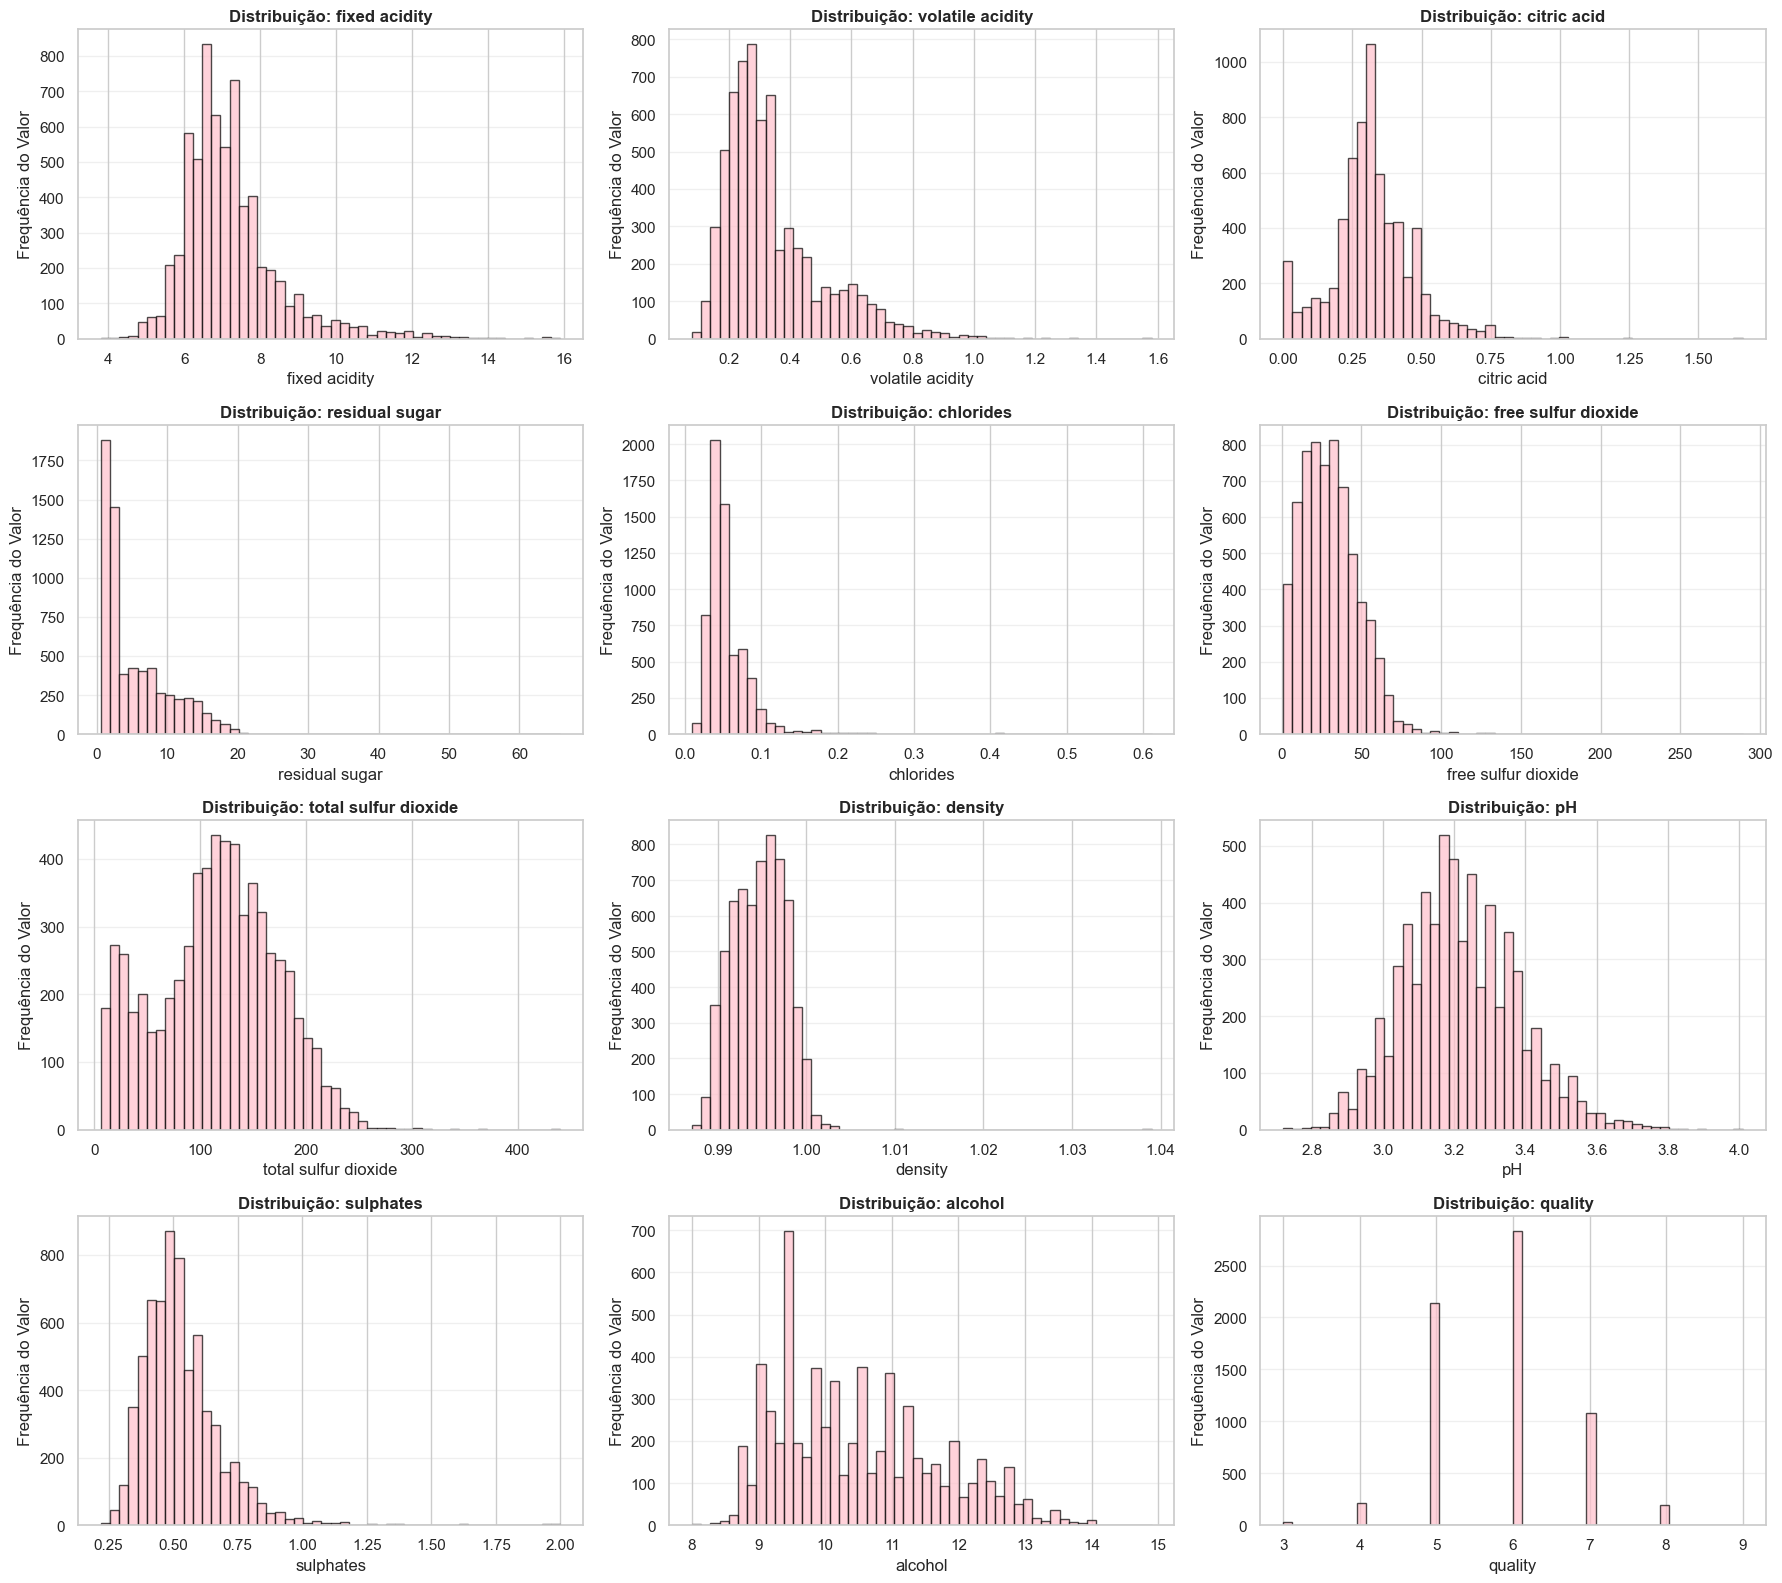

In [24]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = (
    axes.ravel()
)  # "achatando" os eixos unidimmensionalmente para iterar com apenas 1 loop for

numeric_cols = df.select_dtypes(
    include=[np.number]
).columns  # apenas as colunas numéricas

# Plots para cada coluna
for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=50, edgecolor="black", alpha=0.7, color="pink")
    axes[idx].set_title(f"Distribuição: {col}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequência do Valor")
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações**:
- <span style="color: pink;"> *Assimetria*: Muitas variáveis químicas (como `residual_sugar`, `sulphates`, `total_sulfur_dioxide`) apresentam uma distribuição assimétrica, com cauda longa à direita. Isso indica que a maioria dos vinhos tem valores baixos, mas alguns têm valores extremamente altos (prováveis outliers)
- <span style="color: pink;"> *Qualidade*: Segue distribuição muito próxima da normal (picos centrais), concentrada entre 5-7, indicando que vinhos extremos (muito ruins ou excelentes) são raros
- <span style="color: pink;"> *pH e densidade*: Mostram distribuições um pouco mais simétricas, indicando que são características químicas mais estáveis

<span style="color: pink;"> A maior atenção aqui são as variáveis assimétricas, talvez seja necessário algum tipo de tratamento para treinar o modelo de Machine Learning com elas (normalizações ou funções logarítimicas)

---
### <span style="color: pink;"> **Análise de Outliers (Boxplots)** 

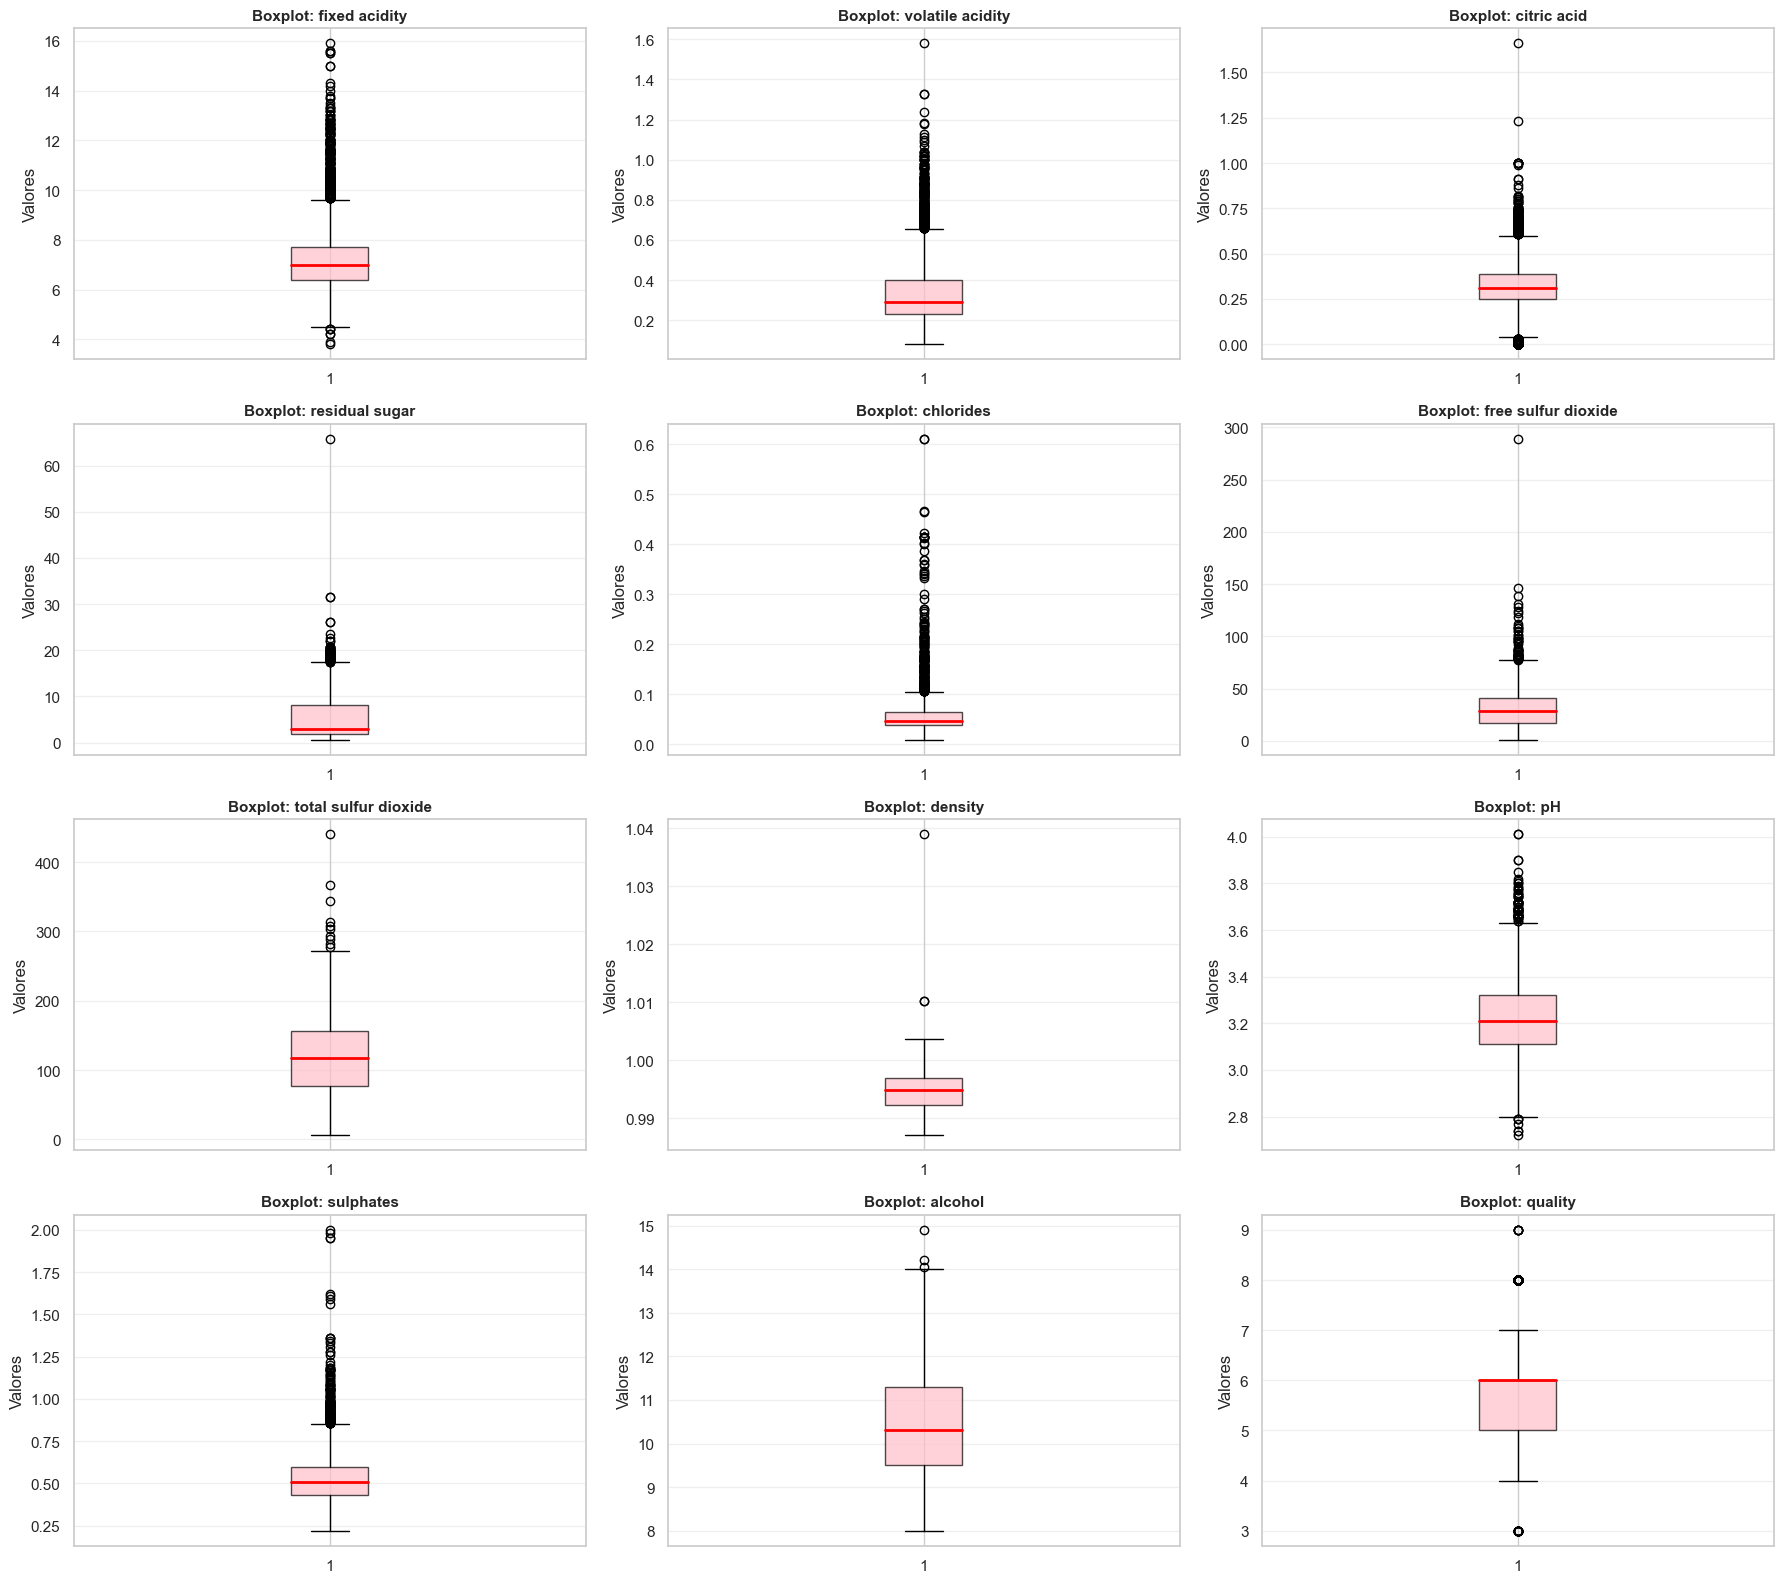

In [25]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(
        df[col],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor="pink", alpha=0.7),
        medianprops=dict(color="red", linewidth=2),
    )
    axes[idx].set_title(f"Boxplot: {col}", fontsize=11, fontweight="bold")
    axes[idx].set_ylabel("Valores")
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações:**

- <span style="color: pink;"> ***MUITOS*** *outliers*: Variáveis como `residual_sugar`, `chlorides`, `free_sulfur_dioxide` e `total_sulfur_dioxide` têm muitos pontos fora das caixas
- <span style="color: pink;"> ***Outliers não são erros***: No contexto de vinho, esses valores extremos podem representar vinhos únicos (vinhos doces com muito açúcar residual, por exemplo), não são erros necessariamente

<span style="color: pink;"> **O que fazer então?**

- <span style="color: pink;"> Não removerei todos os outliers - eles podem ser legítimos e dão variabilidade aos nossos dados
- <span style="color: pink;"> Tentarei usar métodos robustos a outliers (Tratamento IQR)
- <span style="color: pink;"> Outliers em variáveis químicas provavelmente indicam diferentes estilos de vinho.

---




### <span style="color: pink;"> **Tratando Outliers (IQR)**

<span style="color: pink;">  O método de identificação de interquartis tira proveito do conceito dos boxplots e "cerca" os dados para definir outliers fora de certo alcance. A imagem abaixo  *(fonte: https://www.scribbr.com/statistics/outliers/)* explica visualmente a lógica:

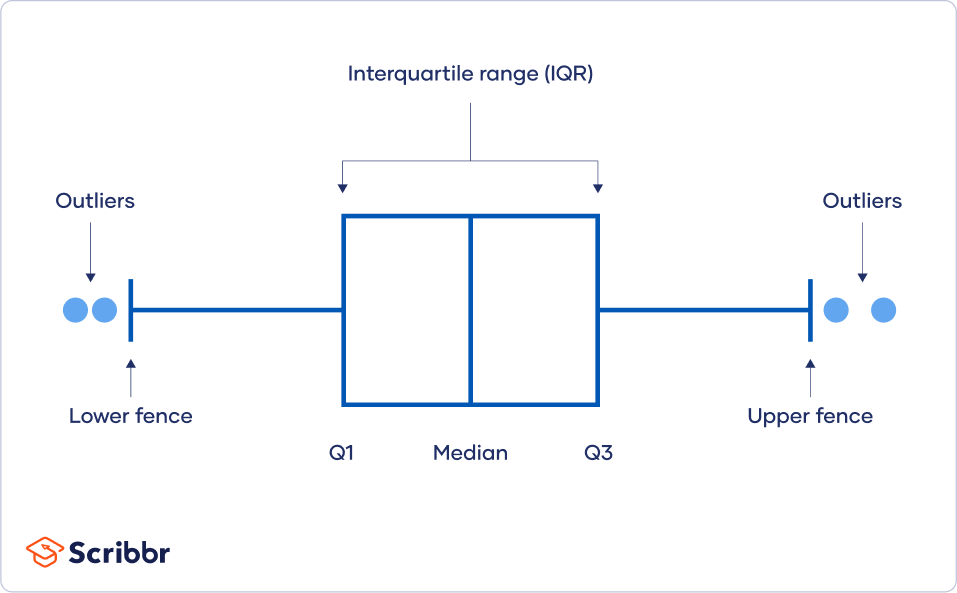

In [26]:
def outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers_inferiores = df[df[column] < lower_fence]
    outliers_superiores = df[df[column] > upper_fence]
    return len(outliers_inferiores), len(outliers_superiores), lower_fence, upper_fence

<span style="color: pink;"> A função acima implementa a lógica de IQR para encontrar a quantidade de outliers, agora, vamos analisá-los: 

In [27]:
outlier_arr = []
for col in numeric_cols:
    n_outliers_inf, n_outliers_sup, lf, uf = outliers_IQR(df, col)
    outlier_arr.append(
        {
            "Variável": col,
            "Num Outliers Inf": n_outliers_inf,
            "Num Outliers Sup": n_outliers_sup,
            "Limite Inferior": round(lf, 2),
            "Limite Superior": round(uf, 2),
        }
    )

outlier_df = pd.DataFrame(outlier_arr)
outlier_df

,Variável,Num Outliers Inf,Num Outliers Sup,Limite Inferior,Limite Superior
0,fixed acidity,7,350,4.45,9.65
1,volatile acidity,0,377,-0.02,0.66
2,citric acid,279,230,0.04,0.60
3,residual sugar,0,118,-7.65,17.55
4,chlorides,0,286,-0.00,0.11
5,free sulfur dioxide,0,62,-19.00,77.00
6,total sulfur dioxide,0,10,-41.50,274.50
7,density,0,3,0.99,1.00
8,pH,7,66,2.80,3.64
9,sulphates,0,191,0.18,0.86


<span style="color: pink;"> Há algumas observações principais a serem feitas:

- <span style="color: pink;"> *Limites Inferiores*: alguns limites ficaram com valores negativos por conta da distribuição e formato dos dados em valores muito baixos, mas isso não influencia na identificação de outliers, pois significa que se o valor é baixo, muito provavelmente está dentro dos quartis desejados e não foi identificado nenhum valor negativo, o que reforça que o dataset trabalha com dados reais.

- <span style="color: pink;"> *Acidez Fixa e Acidez Volátil*: apesar de aparentarem terem muitos outliers, estes são valores que não queremos remover. Após uma breve pesquisa sobre o que cada uma representa no vinho e analisar nossos histogramas, todos os valores parecem plausíveis e dentro da normalidade. Serão "outliers" muito interessantes de se analisar, pois em níveis muito baixos (geralmente abaixo de 0,6-0,9 g/L, que é o caso da maioria do dataset), pode contribuir para a complexidade e frescor. No entanto, em excesso (os 377 outliers), confere aromas indesejáveis de vinagre, aceto balsâmico, verniz ou cola, comprometendo a qualidade e o aroma do vinho, ou seja, poderemos investigar se os vinhos muito ácidos recebem avaliações piores ou não.

- <span style="color: pink;"> *pH*: é o único campo que **talvez** seja justificável remover ou substituir outliers, mais especificamente os inferiores. A faixa geral de pH no vinho segundo pesquisas que fiz no google é de 2,5 a 4,5, com vinhos brancos tendo pH mais baixo, em torno de 3,0 a 3,5 e vinhos tintos com pH mais alto, em torno de 3,5 a 4,0. Seria possível substituir os pH's abaixo de 2,5 por esse limite, mas são tão poucos que não acho que vão influenciar no resultado final. Quanto aos valores acima da nossa cerca, provavelmente são normais tendo em vista a pesquisa que fiz.

- <span style="color: pink;"> *Outras Variáveis*: É normal haverem vinhos cítricos e não-cítricos, mais doces ou mais amargos, etc, então muitos valores não-citados que foram classificados como outliers aqui provavelmente são apenas tipos únicos de vinho.

<span style="color: pink;"> **Conclusão**: antes me assustei com os boxplots, mas a verdade é que os vinhos do dataset são extremamente variados, estando em sua maioria com valores dentro da variabilidade normal para vinhos segundo minhas buscas no google. Então, decidi que não vou remover outliers, mas será necessário transformar as escalas de alguns valores, como já mencionei antes.

---


### <span style="color: pink;"> **Correlações**

<span style="color: pink;"> Abaixo, estão dois heatmaps de correlações, analisamos quais variáveis são simétricas e a força das correlações para que façamos boas regressões. Fiz um heatmap para cada tipo de vinho, pois podem haver critérios diferentes para avaliar a qualidade dependendo do tipo.

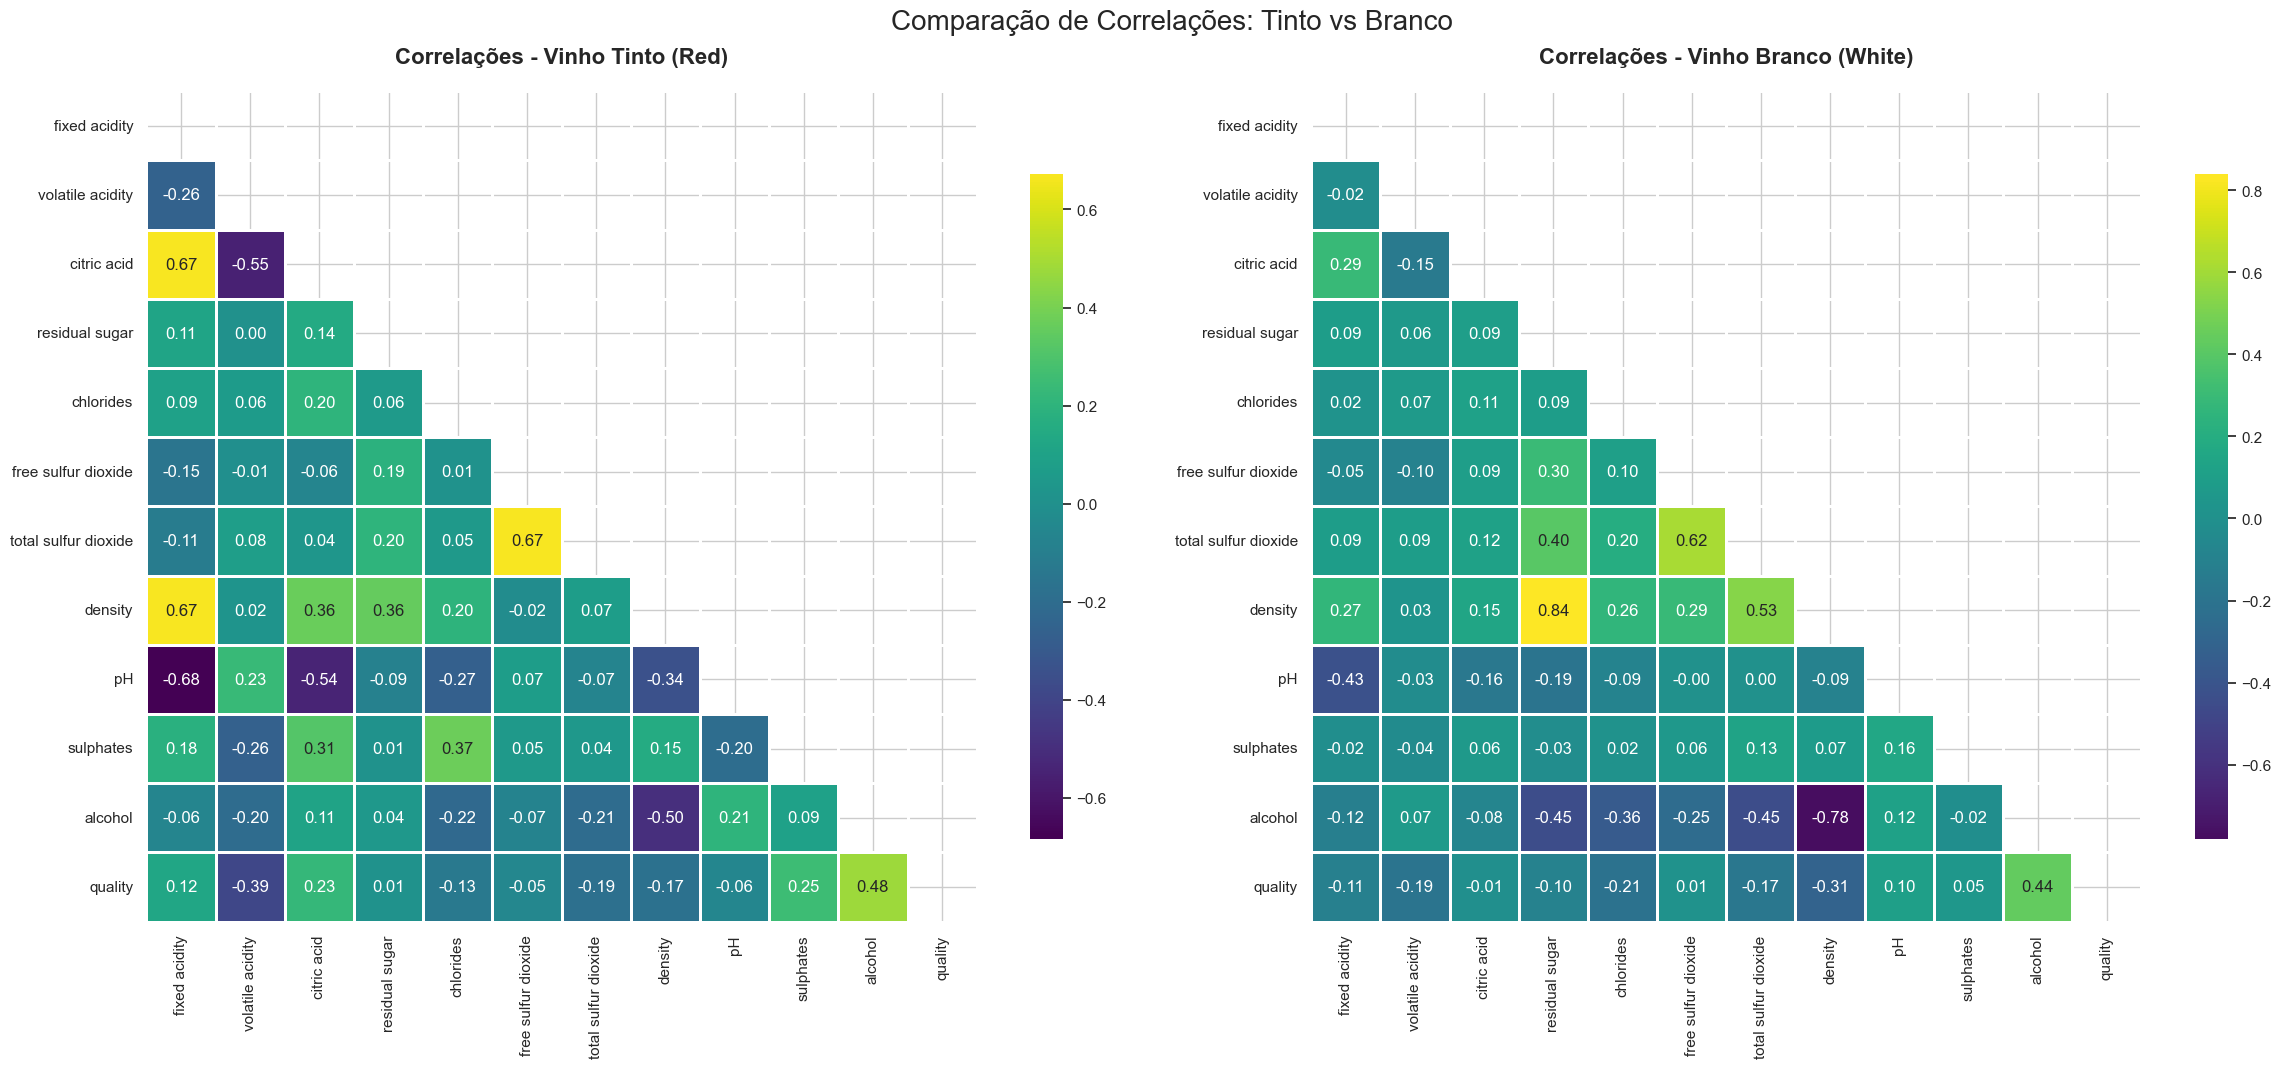

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
wine_types = ["red", "white"]
titles = ["Correlações - Vinho Tinto (Red)", "Correlações - Vinho Branco (White)"]

for i, wine_type in enumerate(wine_types):
    df_filtered = df[df["type"] == wine_type]
    correlation_matrix = df_filtered[numeric_cols].corr()

    # Cria uma máscara responsável por remover a metade duplicada das correlações
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={"shrink": 0.8},
        ax=axes[i]
    )  # Deixei sem o vmin e o vmax pois fica mais fácil de visualizar os valores mais relevantes
    
    axes[i].set_title(
        f"{titles[i]}", fontsize=16, fontweight="bold", pad=20
    )

plt.suptitle("Comparação de Correlações: Tinto vs Branco", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

<span style="color: pink;"> A escolha de dividir entre tipos foi o correto, antes havia feito o mesmo heatmap para o dataset inteiro, juntando os tipos de vinhos, mas não obtive bons resultados nas correlações, enquanto dessa forma temos valores muito mais norteadores.

<span style="color: pink;"> **Correlações do Vinho Tinto:**

* <span style="color: pink;"> Podemos perceber de cara correlações **positivas** médias/fortes entre `density` e `fixed acidity`; entre `free sulfur dioxide` e `total sulfur dioxide`; entre `fixed acidity` e `citric acid`. Destas, a mais óbvia é a entre os níveis de dióxido de enxofre, então na hora de realizar regressões não vou incluir ambas as colunas, apenas uma.

* <span style="color: pink;"> Quanto às correlações **negativas** médias/fortes entre `fixed acidity` e `pH`; entre `citric acid` e `pH`; entre `citric acid` e `volatile acidity`. Isso indica que provavelmente não utilizarei a coluna de pH nem a de ácido cítrico de para regressões, pois já há duas colunas indicativas de acidez (`fixed acidity` e `volatile acidity`) e o pH também é um dos indicativos para medir acidez. Já a coluna de ácido cítrico seria redundante pois além da correlação negativa forte com pH, possui a positiva que citei antes com `fixed acidity`. Por fim, a última correlação negativa relevante é entre `alcohol` e `density`, mostrando que em pelo menos metade dos casos as variáveis seguem uma relação inversa, com uma crescendo enquanto a outra diminui, isso provavelmente ocorre porque o álcool etílico (etanol) gerado na fermentação é menos denso que a água presente no vinho. Apesar disso, não é uma correlação forte o suficiente para justificar a inutilização de uma das colunas.

* <span style="color: pink;"> Por fim, separei a análise de `quality` por ser nossa variável alvo. Todas as correlações são fracas demais, com exceção de `volatile acidity` e `alcohol` sendo as únicas médias, uma negativa e outra positiva, respectivamente. Para a regressão linear simples com certeza vou utilizar o nível alcoólico do vinho, para a múltipla, todas menos as que citei no parágrafo anterior que acabam sendo redundantes. 

<span style="color: pink;"> **Correlações Vinho Branco:**

<span style="color: pink;"> O comportamento físico-químico do vinho branco se mostrou distinto do tinto. Enquanto o tinto é governado pelas relações de acidez, o branco parece ser governado pela relação Açúcar/Álcool/Densidade.

* <span style="color: pink;"> A correlação positiva mais gritante (e perigosa para a regressão) é entre `density` e `residual sugar` (0.84). É uma correlação fortíssima, muito maior que no vinho tinto. Acredito que o açúcar residual seja o principal agente para aumentar a densidade do líquido. Como essa correlação é quase linear, incluir ambas em uma regressão múltipla causaria problemas de multicolinearidade. Logo, optarei por manter `residual sugar` e remover `density`, já que são causa e consequência respectivamente. Também, assim como no vinho tinto, temos a relação óbvia entre `free sulfur dioxide` e `total sulfur dioxide` (0.62). A lógica se mantém: utilizaremos apenas uma delas para evitar redundância.

* <span style="color: pink;"> A correlação negativa mais forte é entre `density ` e `alcohol` (-0.78), diferença fundamental em relação ao tinto. No vinho tinto essa relação era moderada (-0.50), mas aqui é forte. Isso mostra um comportamento claro da densidade: ela é puxada para cima pelo açúcar e para baixo pelo álcool, ou seja `density` no vinho branco não traz informação nova, ela é praticamente uma função matemática de quanto álcool e açúcar existem no vinho. Assim, fica óbvio que emover a coluna density é quase obrigatório para o modelo de vinho branco funcionar bem.

* <span style="color: pink;"> Diferente do vinho tinto, as relações de acidez (`fixed acidity`, `volatile acidity`, `citric acid` e `pH`) são bem mais fracas ou difusas no vinho branco. Não há aquela "troca óbvia" que permitiria descartar o pH ou o ácido cítrico com tanta segurança quanto no tinto, pois as correlações são menores (ex: `Fixed Acidity` vs `pH` é apenas -0.43, contra -0.68 no tinto). Talvez valha a pena testar manter mais variáveis de acidez aqui inicialmente.

* <span style="color: pink;"> Já a variável alvo (`quality`) apresenta algumas correlações. Em relação a `alcohol` (0.44), novamente, o teor alcoólico é o maior indicador positivo de qualidade. Vinhos com maior teor alcoólico tendem a ter notas maiores. Também há a coluna `density` (-0.31), a qual tem uma correlação negativa relevante, mas como decidimos que ela é redundante (espelho do álcool e açúcar), ela confirma que não precisamos dela. Por fim, temos a coluna `chlorides` (-0.21) e a coluna `volatile acidity` (-0.19), as quais ao contrário do tinto, onde a acidez volátil era o grande "vilão" da qualidade (-0.39), no branco ela importa menos. Porém, os cloretos (sais) aparecem aqui como um fator negativo leve que não existia no tinto.

---

### <span style="color: pink;"> **Análise da Distribuição da Qualidade por Tipo de Vinho**

<span style="color: pink;"> Plotando a qualidade em relação ao tipo de vinhos no formato de boxplot e histograma.

C:\Users\Vinícius Abdon\AppData\Local\Temp\ipykernel_17556\1605072631.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='quality', ax=axes[1], palette='pastel')


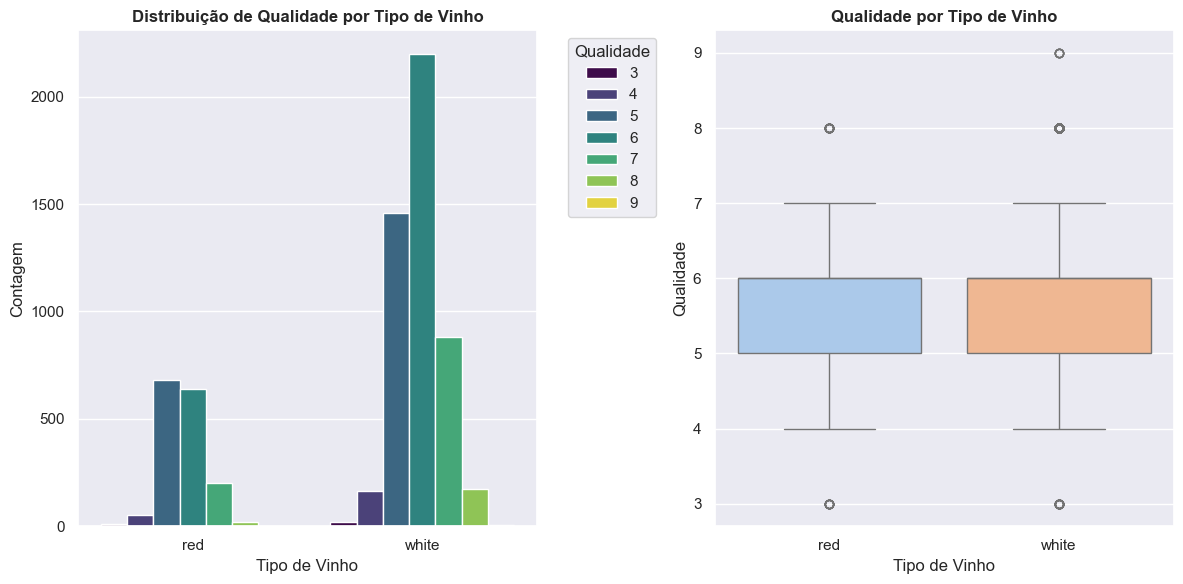

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras (histograma)
sns.countplot(data=df, x='type', hue='quality', ax=axes[0], palette='viridis')

axes[0].set_title('Distribuição de Qualidade por Tipo de Vinho', fontweight='bold')
axes[0].set_xlabel('Tipo de Vinho')
axes[0].set_ylabel('Contagem')
# Ajusta a legenda para fora
axes[0].legend(title='Qualidade', bbox_to_anchor=(1.05, 1), loc='upper left')


# Boxplot
sns.boxplot(data=df, x='type', y='quality', ax=axes[1], palette='pastel')

axes[1].set_title('Qualidade por Tipo de Vinho', fontweight='bold')
axes[1].set_xlabel('Tipo de Vinho')
axes[1].set_ylabel('Qualidade')

plt.tight_layout()
plt.show()

<span style="color: pink;"> Podemos perceber que vinhos brancos e tintos têm distribuições de qualidade semelhantes, com ambos concentrando-se numa qualidade média (5 a 6), sendo poucos os vinhos que recebem notas extremas (3 ou 9). Isso demonstra que o tipo de vinho não é um preditor muito importante para avaliar a qualidade, sendo mais associado ao comportamento químico. Então, a coluna `type` não é muito relevante para a regressão em si, mas será necessária para separar o dataset devido aos diferentes precursores de qualidade para cada tipo de vinho como vimos anteriormente.

---

### <span style="color: pink;"> **Transformações Logarítmicas**
<span style="color: pink;"> Por fim, para encerrar a EDA, vou fazer algumas transformações em certas variáveis que possuem um comportamento assimétrico, com o intuito de tentar normalizar seu comportamento de modo a melhorar as futuras regressões.

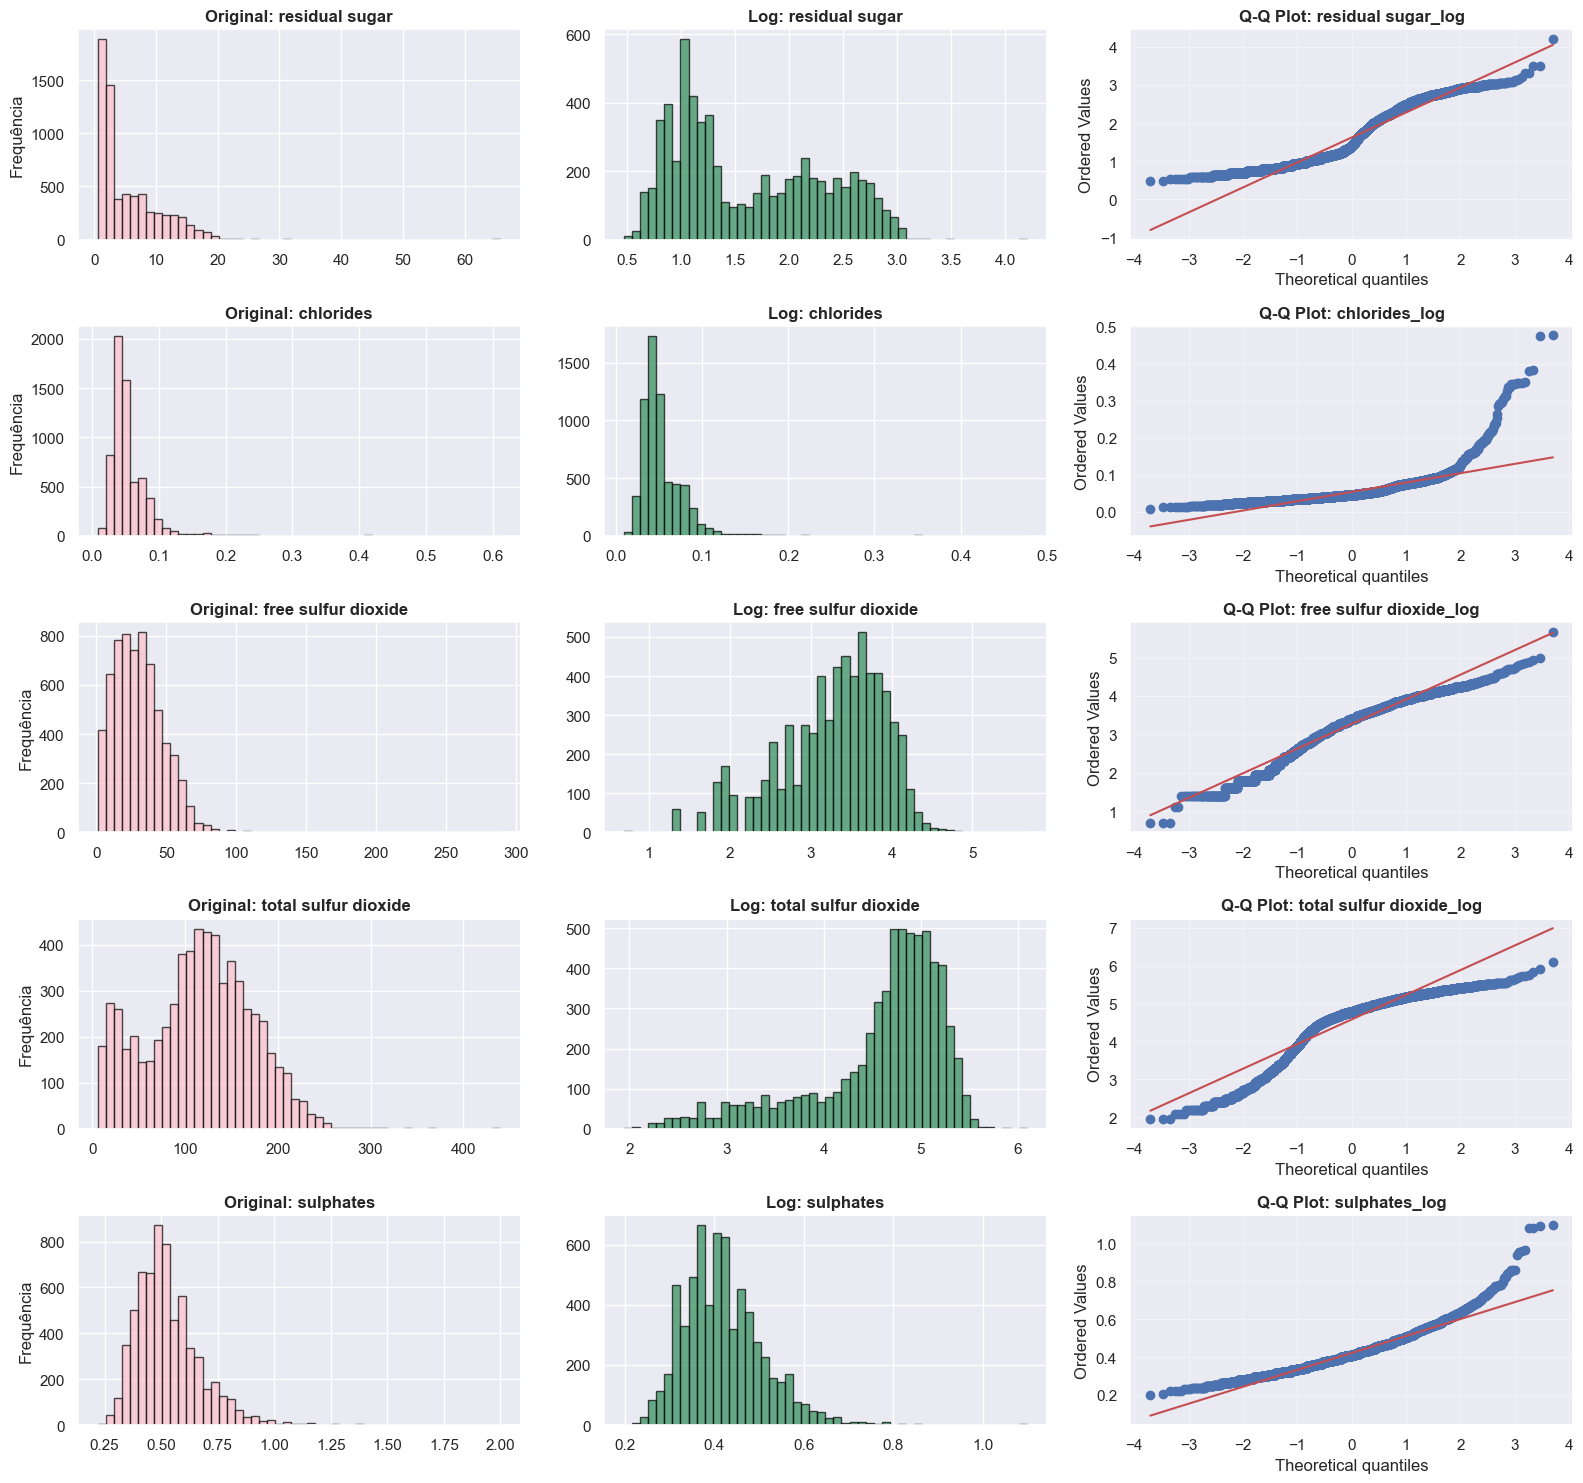

In [30]:
# Variáveis para transformar (assimétricas identificadas)
skewed_vars = ['residual sugar', 'chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide', 'sulphates']

df_transformed = df.copy()
for var in skewed_vars:
    # Log (adicionamos uma pequena constante para evitar log(0))
    df_transformed[f'{var} log'] = np.log1p(df[var])

# Comparação de gráficos
fig, axes = plt.subplots(len(skewed_vars), 3, figsize=(16, 3*len(skewed_vars)))

for idx, var in enumerate(skewed_vars):
    # Histograma Original
    axes[idx, 0].hist(df[var], bins=50, edgecolor='black', alpha=0.7, color='pink')
    axes[idx, 0].set_title(f'Original: {var}', fontweight='bold')
    axes[idx, 0].set_ylabel('Frequência')
    
    # Histograma Transformado
    axes[idx, 1].hist(df_transformed[f'{var} log'], bins=50, edgecolor='black', 
                      alpha=0.7, color='seagreen')
    axes[idx, 1].set_title(f'Log: {var}', fontweight='bold')
    
    # Q-Q Plot para identificar se os dados seguem a distribuição normal
    stats.probplot(df_transformed[f'{var} log'], dist="norm", plot=axes[idx, 2])
    axes[idx, 2].set_title(f'Q-Q Plot: {var}_log', fontweight='bold')
    axes[idx, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> Analisando os Q-Q plots (que comparam a distribuição dos dados com uma distribuição normal), percebemos algumas melhorias distintas. Variáveis como `sulphates` e `free sulfur dioxide` tiveram seus comportamentos quase normalizados após a transformação logarítmica, com os pontos muito próximos à linha vermelha de referência (o sulphates, inclusive, já apresentava boa simetria original, mas foi uma tentativa de melhorar o que já era bom).

<span style="color: pink;"> Entretanto, outras variáveis não parecem terem sido muito alteradas pela transformação. O `total sulfur dioxide` sofreu uma inversão curiosa, a cauda longa que era à direita inverteu-se para a esquerda. Enquanto o residual sugar é o caso mais estranho, pois o histograma revela uma distribuição com dois picos. Isso provavelmente acontece pois há a existência de dois subgrupos distintos nos dados: vinhos tintos e brancos e, como vimos anteriormente, o açúcar residual é importante para o vinho branco. Esse cenário gerou um Q-Q plot em formato de "S" que o logaritmo não consegue resolver sozinho.

<span style="color: pink;"> Assim, só resta fazer um teste de normalidade para confirmar as observações.

In [31]:
# Teste de normalidade com Shapiro-Wilk
# Passei uma sample de 500 pois com uma sample muito grande o teste detecta qualquer desvio microscópico da normalidade 
# perfeita e retorna um p-value minúsculo, o que tira a sua utilidade prática. Então usei um quarto do valor máximo recomendado por
# este documento do medium.com https://medium.com/@data-overload/the-shapiro-wilk-test-a-guide-to-normality-testing-d730e820d1a8
sample_size = min(500, len(df))
sample_idx = np.random.choice(df.index, sample_size, replace=False)

results = []
for var in skewed_vars:
    _, p_original = stats.shapiro(df.loc[sample_idx, var])
    _, p_transformed = stats.shapiro(df_transformed.loc[sample_idx, f'{var} log'])
    
    results.append({
        'Variável': var,
        'Skewness Original': df[var].skew().round(2),
        'Skewness Log': df_transformed[f'{var} log'].skew().round(2),
        'p-value Original': f'{p_original:.4f}',
        'p-value Log': f'{p_transformed:.4f}'
    })

results_df = pd.DataFrame(results)
results_df

,Variável,Skewness Original,Skewness Log,p-value Original,p-value Log
0,residual sugar,1.44,0.41,0.0000,0.0000
1,chlorides,5.40,4.48,0.0000,0.0000
2,free sulfur dioxide,1.22,-0.72,0.0000,0.0000
3,total sulfur dioxide,-0.00,-1.35,0.0000,0.0000
4,sulphates,1.80,1.10,0.0000,0.0000


<span style="color: pink;"> O teste diz que **nenhuma** das distribuições é normal (p-value < 0.05), o que provavelmente é verdade, mas precisamos que apenas sejam próximas da normalidade. Então, neste caso, é melhor confiarmoms na observação do que no valor que espera a perfeição. Assim, como podemos ver pelas variáveis de skeweness, as transformações diminuiram a assimetria na maioria dos casos, aproximando-a de 0. `residual sugar`, `chlorides` e `sulphates` tiveram comportamentos melhorados, então ainda é válido transformá-los. Já `total sulfur dioxide` e `free sulfur dioxide` se afastaram mais ainda da normalidade, então provavelmente não devemos transformar estas colunas.

---

### <span style="color: pink;"> **Fim da EDA** 

<span style="color: pink;"> Estou muito satisfeito com o que consegui descobrir acerca do dataset. Acredito que com os insights adquiridos durante esta análise já será possível gerar modelos muito melhores de ML do que se houvesse feito direto o aprendizado de máquina sem verificar os dados antes. 

---

## <span style="color: Chocolate;"> **2. Regressões**

<span style="color: Chocolate;"> **Bibliotecas e preparação de dados:**

In [32]:
from sklearn.linear_model import LinearRegression
import sys
sys.path.append('../src')
import data_preparation as dp


df = dp.load_data()
df = dp.apply_log_transforms(df)
df_red = df[df['type'] == 'red'].drop('type', axis=1)
df_white = df[df['type'] == 'white'].drop('type', axis=1)
print(df_red.shape,'\n',df_white.shape)

(1599, 15) 
 (4898, 15)


---
### <span style="color: Chocolate;"> **Regressões Simples:**

<span style="color: Chocolate;"> A variável com as maiores correlações com `quality` em ambos os tipos de vinhos é o nível de teor alcoólico (`alcohol`), portanto usaremos ela.

=== REGRESSÃO DO VINHO TINTO ===
alcohol vs quality

BASELINE (Média simples):
{'MSE': 0.654861974559657, 'RMSE': 0.8092354259173636, 'MAE': 0.6824784932221064, 'R²': -0.0020751385243185094}

 MODELO DE REGRESSÃO:
Coeficiente (alcohol): 0.3749
Intercepto: 1.7339
RMSE: 0.7061
MAE:  0.5754
R²:   0.2371


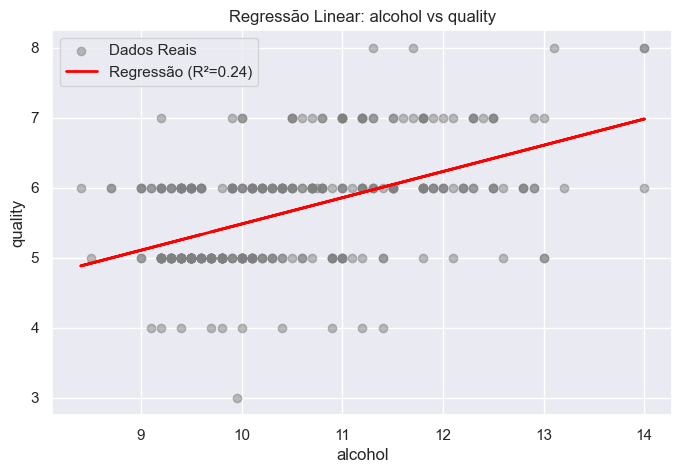

=== REGRESSÃO DO VINHO BRANCO ===
alcohol vs quality

BASELINE (Média simples):
{'MSE': 0.7759837955120314, 'RMSE': 0.8808994241751049, 'MAE': 0.67709951237132, 'R²': -0.001950563871335742}

 MODELO DE REGRESSÃO:
Coeficiente (alcohol): 0.3082
Intercepto: 2.6217
RMSE: 0.7865
MAE:  0.6268
R²:   0.2014


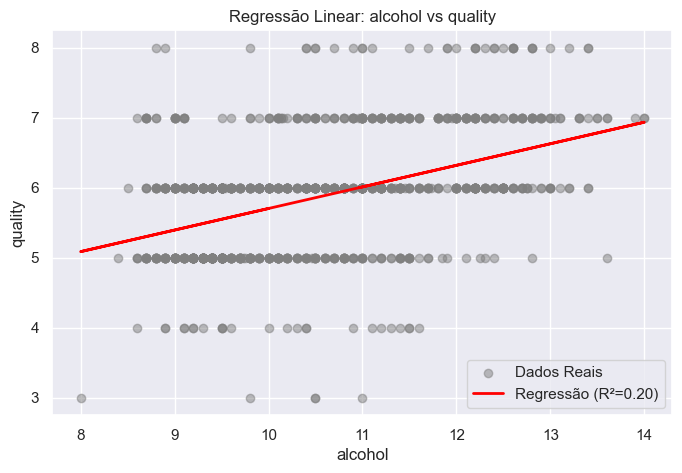

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import data_preparation as dp
import numpy as np # Importante para evitar erros de tipo se precisar

def regressao_simples(df, feature, target):
    """
    Args:
        df: pd.DataFrame
        feature: str (Nome da coluna X - ex: 'alcohol')
        target: str (Nome da coluna Y - ex: 'quality')
    """
    
    X = df[[feature]]
    y = df[[target]]
    
    X_train, X_val, X_test, y_train, y_val, y_test = dp.split_data(X, y)
    
    # Treinando o modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"{feature} vs {target}\n")
    print("BASELINE (Média simples):")
    print(dp.get_baseline(y_train, y_test))
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Extraindo coeficientes
    coef = model.coef_.flatten()[0]
    intercept = model.intercept_.flatten()[0]

    print("\n MODELO DE REGRESSÃO:")
    print(f"Coeficiente ({feature}): {coef:.4f}")
    print(f"Intercepto: {intercept:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    
    # Plots
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Dados Reais')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label=f'Regressão (R²={r2:.2f})')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Regressão Linear: {feature} vs {target}')
    plt.legend()
    plt.show()

# Executando a função
print("=== REGRESSÃO DO VINHO TINTO ===")
regressao_simples(df_red, 'alcohol', 'quality')

print("=== REGRESSÃO DO VINHO BRANCO ===")
regressao_simples(df_white, 'alcohol', 'quality')

<span style="color: Chocolate;"> **Análise das Métricas de Erro:**

* <span style="color: Chocolate;"> Em comparação à baseline, O erro médio (RMSE) caiu de 0.81 (usando um "chute" médio) para 0.71 (usando o álcool) no vinho tinto, enquanto no vinho branco o erro caiu de 0.88 para 0.79, ou seja, saber o teor alcoólico reduz significativamente a incerteza sobre a qualidade do vinho, mas ainda não é suficiente.

* <span style="color: Chocolate;"> Já o R² mostra que o álcool, sozinho, explica 23.7% da variação da qualidade nos vinhos tintos e 20.1% nos brancos, confirmando que ele é sim importante para definir a qualidade do vinho, mas deixando os outros 80% sem explicação clara, algo que provavelmente será mitigado pelas outras features na regressão múltipla.

* <span style="color: Chocolate;"> Nosso MAE mostra por quanto erramos na predição, ou seja, na prática, ao prever a qualidade de um vinho usando o álcool, a nossa previsão varia, em média, 0.57 pontos para cima ou para baixo da nota real do vinho tinto e 0.62 do vinho branco. Isso é muito bom! Pois a escala vai de 0 a 10, então nossa margem de erro é menos de 10% mesmo com apenas o álcool, o que provavelmente vai melhorar ainda mais na regressão múltipla.

* <span style="color: Chocolate;"> Por fim, o coeficiente de inclinação do vinho tinto (0.37) é maior que o do branco (0.31). O que indica que consumidores de vinho tinto valorizam um pouco mais o teor alcoólico do que os consumidores de vinho branco.

---

### <span style="color: Chocolate;"> **Regressões Múltiplas:**

<span style="color: Chocolate;"> Seguindo as análises de correlações, para evitar a multicolinearidade, vou dropar algumas colunas. Mais detalhes no arquivo de `data_preparation.py`.

TIPO DO VINHO: VINHO TINTO
Features selecionadas (8): ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'density', 'alcohol', 'residual sugar log', 'chlorides log', 'sulphates log']

BASELINE (Média):
RMSE: 0.8092 | MAE: 0.6825

REGRESSÃO MÚLTIPLA:
RMSE: 0.6196 (Melhora de 0.1896)
MAE:  0.5021
R²:   0.4126

 Principais Impactos Positivos:
              Feature  Coeficiente
7       sulphates log     1.650241
4             alcohol     0.242508
5  residual sugar log     0.175894

 Principais Impactos Negativos (se hover):
            Feature  Coeficiente
3           density   -58.279481
6     chlorides log    -1.883750
1  volatile acidity    -1.014450


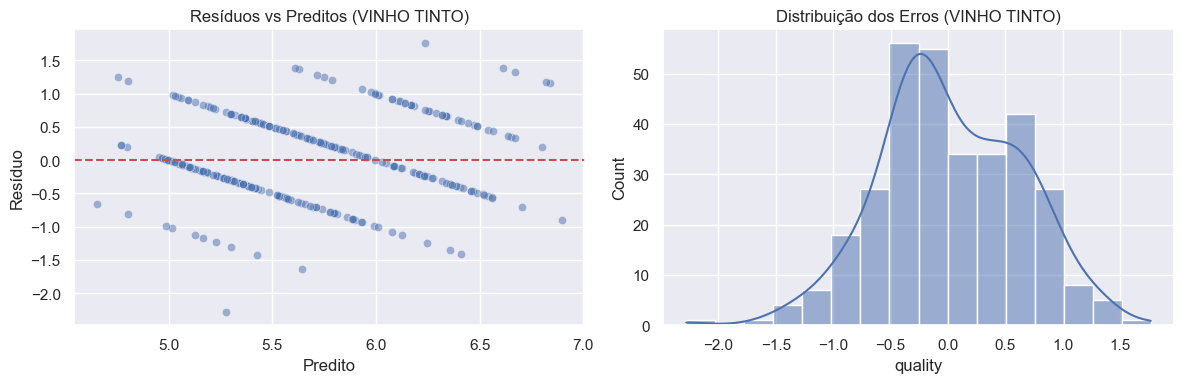

TIPO DO VINHO: VINHO BRANCO
Features selecionadas (9): ['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'pH', 'alcohol', 'residual sugar log', 'chlorides log', 'sulphates log']

BASELINE (Média):
RMSE: 0.8809 | MAE: 0.6771

REGRESSÃO MÚLTIPLA:
RMSE: 0.7597 (Melhora de 0.1212)
MAE:  0.5965
R²:   0.2548

 Principais Impactos Positivos:
              Feature  Coeficiente
8       sulphates log     0.747300
5             alcohol     0.360423
6  residual sugar log     0.176855

 Principais Impactos Negativos (se hover):
            Feature  Coeficiente
1  volatile acidity    -2.203629
7     chlorides log    -0.684302
0     fixed acidity    -0.084956


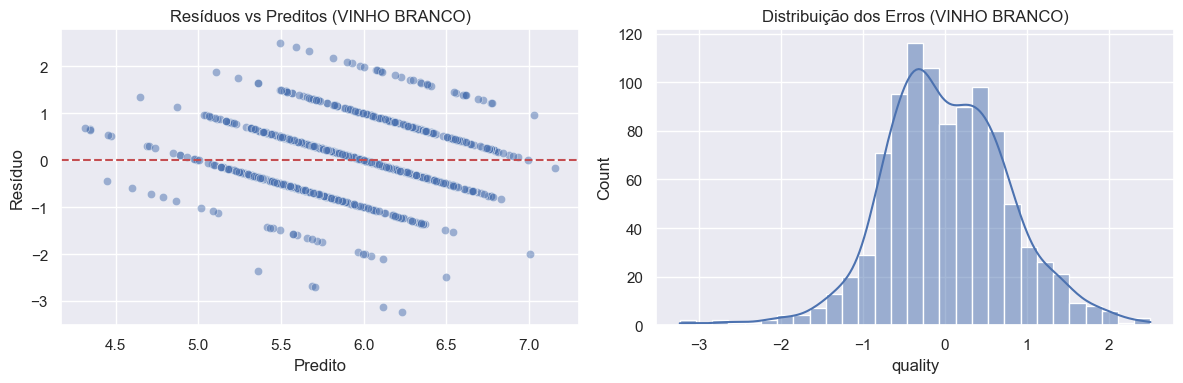

In [34]:
df = dp.load_data()
df = dp.apply_log_transforms(df) # Cria as colunas com as transformações logaritmicas

def regressao_múltipla(df, func_prep, nome_vinho):   
    print(f"TIPO DO VINHO: {nome_vinho}")
    # Seleciona as colunas certas e filtra o tipo do vinho
    X, y = func_prep(df)
    
    print(f"Features selecionadas ({X.shape[1]}): {list(X.columns)}")
    
    X_train, X_val, X_test, y_train, y_val, y_test = dp.split_data(X, y)
    
    # Treinamento do Modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Métricas e Comparação com Baseline
    print("\nBASELINE (Média):")
    base_metrics = dp.get_baseline(y_train, y_test)
    print(f"RMSE: {base_metrics['RMSE']:.4f} | MAE: {base_metrics['MAE']:.4f}")
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\nREGRESSÃO MÚLTIPLA:")
    print(f"RMSE: {rmse:.4f} (Melhora de {base_metrics['RMSE'] - rmse:.4f})")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    
    # 5. Coeficientes (Basicamente o nível de importância de cada variável)
    coefs = pd.DataFrame({
        'Feature': X.columns,
        'Coeficiente': model.coef_.flatten()
    }).sort_values(by='Coeficiente', ascending=False)
    
    print("\n Principais Impactos Positivos:")
    print(coefs.head(3))
    print("\n Principais Impactos Negativos (se hover):")
    print(coefs.tail(3).sort_values(by='Coeficiente')) # Reordena para facilitar leitura
    
    # Gráfico de análise de Resíduos
    residuos = y_test - y_pred
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuos, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'Resíduos vs Preditos ({nome_vinho})')
    plt.xlabel('Predito')
    plt.ylabel('Resíduo')
    
    plt.subplot(1, 2, 2)
    sns.histplot(residuos, kde=True)
    plt.title(f'Distribuição dos Erros ({nome_vinho})')
    
    plt.tight_layout()
    plt.show()

regressao_múltipla(df, dp.prepare_features_red, "VINHO TINTO")
regressao_múltipla(df, dp.prepare_features_white, "VINHO BRANCO")

<span style="color: Chocolate;"> **Análise das Métricas de Erro:**

* <span style="color: Chocolate;"> Ao adicionar variáveis como acidez, sulfatos e açúcar, quase dobramos o R² no vinho tinto, Saindo de cerca de 23%, para 41%, e aumentamos um pouco no branco, de cerca de 20% para 25% no branco. Ou seja, esse aumento significativo mostra que o álcool é importante, mas o equilíbrio químico é principal para explicar a variação da qualidade.

* <span style="color: Chocolate;"> Além disso, as previsões ficaram mais afiadas com quedas no RMSE, de 0.70 para 0.61 no vinho tinto e de 0.78 para 0.75 no vinho branco. O modelo agora erra um pouco menos, pois consegue distinguir novas nuances com as novas colunas.

* <span style="color: Chocolate;"> No vinho tinto, o MAE ficou ainda melhor, com um desvio de apenas 0.5 da nota real! No vinho branco também melhorou, mas pouco, saindo de 0.62 para 0.59.


<span style="color: Chocolate;"> **Mas, porque houve melhora? Analisando os Impactos e Coeficientes:**

* <span style="color: Chocolate;"> **Vinho Tinto:** o modelo revelou que os Sulfatos (Log) têm o maior impacto positivo no vinho tinto (Coef: 1.65). Quimicamente, sulfatos agem como antioxidantes e antimicrobianos, ou seja, a sua presença adequada preserva o frescor do vinho, o que o modelo aprendeu a associar com alta qualidade. Por outro lado, a Densidade apareceu com um coeficiente negativo fortíssimo (-58.2), indicando que, mantendo o álcool e açúcar constantes, vinhos tintos "mais finos" tendem a ter notas melhores.

* <span style="color: Chocolate;"> **Vinho Branco:** Um dado interessante é como a Acidez Volátil (indicativo de vinagre/deterioração) pune muito mais o vinho branco do que o tinto. O coeficiente negativo no branco é de -2.20, mais que o dobro do tinto (-1.01). Isso faz sentido, pois vinhos brancos são mais delicados e qualquer defeito de acidez é muito mais facilmente percebido do que em no vinho tinto. Fora isso, os sulphatos tiveram apenas metade do impacto que tiveram no vinho tinto, mas ainda foram o coeficiente mais forte.

<span style="color: Chocolate;"> **Validação das Transformações Log:** As variáveis sulphates log, chlorides log e residual sugar log apareceram no top 3 de importância para ambos os vinhos. Isso comprova que o trabalho de EDA e transformação de dados foi muito eficaz para suavizar a distribuição dessas colunas assimétricas com logaritmo, permitindo que a regressão prevesse o impacto real na qualidade.

<span style="color: Chocolate;"> **Conclusão comparativa entre os vinhos:**

<span style="color: Chocolate;"> O modelo de Regressão Múltipla se ajustou muito melhor aos Vinhos Tintos (R2≈41%) do que aos Brancos (R2≈25%). Isso sugere que a qualidade do vinho tinto é mais fortemente determinada por parâmetros físico-químicos mensuráveis (como estrutura, corpo e acidez), enquanto a qualidade do vinho branco pode depender de outras nuances, como o aroma, as quais que não estão presentes neste dataset.

<span style="color: Chocolate;"> **Análise Gráfica dos Resíduos:**

* <span style="color: Chocolate;"> **Histogramas:** Os gráficos mostram que os erros do modelo seguem uma distribuição aproximadamente Normal (Uma curva Gaussiana), com o pico centralizado quase perfeitamente no zero. Assim, confirmando que o modelo não é enviesado — ou seja, ele não tem "vícios" em chutar a nota sempre para cima ou para baixo. A simetria da curva também valida o sucesso das transformações logarítmicas, que conseguiram tornar mais normal o comportamento das variáveis que antes eram distorcidas.

* <span style="color: Chocolate;"> **Scatter Plots:** Observando os gráficos de dispersão, vemos uma "nuvem" de erros distribuída de forma retangular ao redor do zero, **sem** formar funis ou curvas, os quais são padrões de heterocedasticidade (variância de erros inconstante). Logo, tudo isso indica que o modelo é bom e mantém uma precisão constante, independentemente se o vinho é de baixa ou alta qualidade.

---

### <span style="color: Chocolate;"> **Regressões Polinomiais**:

<span style="color: Chocolate;"> Algumas variáveis podem não seguir comportamentos lineares, se assemelhando mais à parábolas. Nesses casos, a regressão polinomial é muito importante, pois consegue prever esse comportamento elevando as variáveis ao quadrado antes de realizar as interações. Vou incluir comparações com os modelos lineares para uma análise mais rica.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def regressao_polinomial(df, func_prep, nome_vinho, grau=2):
    print(f"REGRESSÃO POLINOMIAL DE GRAU {grau}): {nome_vinho}")
    
    # Preparar dados
    X_raw, y = func_prep(df)
    
    # Transformação Polinomial
    # include_bias=False pois a LinearRegression já calcula o intercepto
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(X_raw)
    
    # Truque pra manter os nomes das colunas (ajuda na interpretação)
    feature_names = poly.get_feature_names_out(X_raw.columns)
    X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
    
    # Usamos o df com as transformações polinomiais
    X_train, X_val, X_test, y_train, y_val, y_test = dp.split_data(X_poly_df, y)
    
    # Treino
    model = LinearRegression() 
    model.fit(X_train, y_train)
    
    # Predições
    y_train_pred = model.predict(X_train) # Para checar overfitting
    y_test_pred = model.predict(X_test)   # Para validação real
    
    # Métricas de Erro
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    print("\nRESULTADOS POLINOMIAIS:")
    print(f"RMSE (Teste): {rmse_test:.4f}")
    print(f"R² (Teste):   {r2_test:.4f}")
    print(f"R² (Treino):  {r2_train:.4f}")
    
    # Checagem de Overfitting (R² de Treino altíssimo, R² de Teste baixo)
    # Isso pode acontecer se o modelo "decorar" os dados de treino, criando curvas malucas que não representam comportamentos reais.
    gap = r2_train - r2_test
    if gap > 0.10:
        print(f"ALERTA ❗❗❗🚨🚨🚨 Possível Overfitting! 💀 Diferença Treino-Teste de {gap:.2f}")
    else:
        print(f"Modelo estável (Diferença Treino-Teste: {gap:.2f})")

    # Interações mais importantes
    coefs = pd.DataFrame({
        'Feature': feature_names,
        'Coeficiente': model.coef_.flatten()
    })
    # Ordenamos por impacto absoluto
    coefs['Impacto_Absoluto'] = coefs['Coeficiente'].abs()
    coefs = coefs.sort_values(by='Impacto_Absoluto', ascending=False).drop(columns=['Impacto_Absoluto'])
    
    print("\nTop 5 Features (Incluindo Interações):")
    print(coefs.head(5))
    
    return model, rmse_test, r2_test

# Vamos usar Grau 2 (Grau 3 pode ser impreciso em datasets pequenos)
print("TESTANDO COM VINHO TINTO")
model_red_poly, rmse_red, r2_red = regressao_polinomial(df, dp.prepare_features_red, "VINHO TINTO", grau=2)

print("--- TESTANDO COM VINHO BRANCO ---")
model_white_poly, rmse_white, r2_white = regressao_polinomial(df, dp.prepare_features_white, "VINHO BRANCO", grau=2)

TESTANDO COM VINHO TINTO
REGRESSÃO POLINOMIAL DE GRAU 2): VINHO TINTO

RESULTADOS POLINOMIAIS:
RMSE (Teste): 0.5938
R² (Teste):   0.4604
R² (Treino):  0.4202
Modelo estável (Diferença Treino-Teste: -0.04)

Top 5 Features (Incluindo Interações):
                  Feature   Coeficiente
3                 density -47435.682592
29              density^2  23853.384174
32  density chlorides log   -511.495620
6           chlorides log    507.776586
1        volatile acidity   -147.048024
--- TESTANDO COM VINHO BRANCO ---
REGRESSÃO POLINOMIAL DE GRAU 2): VINHO BRANCO

RESULTADOS POLINOMIAIS:
RMSE (Teste): 0.7347
R² (Teste):   0.3030
R² (Treino):  0.3207
Modelo estável (Diferença Treino-Teste: 0.02)

Top 5 Features (Incluindo Interações):
                        Feature  Coeficiente
7                 chlorides log    70.775939
52  chlorides log sulphates log   -26.506335
51              chlorides log^2    24.943194
42             pH chlorides log   -15.250621
1              volatile acidity   -1

<span style="color: Chocolate;"> **Análise da Regressão Polinomial (o melhor dos modelos):**

* <span style="color: Chocolate;"> **Salto de Performance:** A maior complexidade da regressão polinomial gerou resultados ainda melhores. No Vinho Tinto, o modelo alcançou um um RMSE de 0.59 e explicando 46% da variância (`R2=0.46`). Isso é um ganho de quase 5% sobre a regressão linear múltipla, a qual já era melhor do que a simples. Também, no Vinho Branco, também subimos para 30% de explicação (R2), confirmando que as relações entre os componentes químicos não são puramente lineares.

* <span style="color: Chocolate;"> **Estabilidade:** felizmente, não houve overfitting! As métricas de treino e teste ficaram praticamente idênticas (diferença < 0.05), mostrando que o modelo gerou  padrões reais da química do vinho, e não ruídos da amostra.

<span style="color: Chocolate;"> **Interpretação das Novas Variáveis (Interações Químicas):**

* <span style="color: Chocolate;"> **Curva da Densidade no Vinho Tinto:** As variáveis `density` e `density^2` apareceram com coeficientes altíssimos (em magnitude de milhares). Isso indica que a presença do termo quadrático na relação da densidade com a qualidade não é uma reta, e sim uma parábola. Logo, existe um ponto ideal de densidade (chamada de "Corpo" nos vinhos) que maximiza a nota, então se for muito fino ou muito denso, a nota tende a cair.

* <span style="color: Chocolate;"> **Cloretos no Vinho Branco:** No vinho branco, o modelo identificou interações muito únicos envolvendo chlorides log (os sais). A interação `chlorides log * sulphates log` indica que o impacto do sal no sabor depende da quantidade de sulfatos. O modelo basicamente aprendeu que o equilíbrio entre conservantes (sulfatos) e sais minerais (cloretos) é mais importante para a qualidade do que essas variáveis isoladas.

<span style="color: Chocolate;"> Para um diagnóstico de resíduos, vou plotar alguns gráficos:

Gráficos de Resíduos: VINHO TINTO


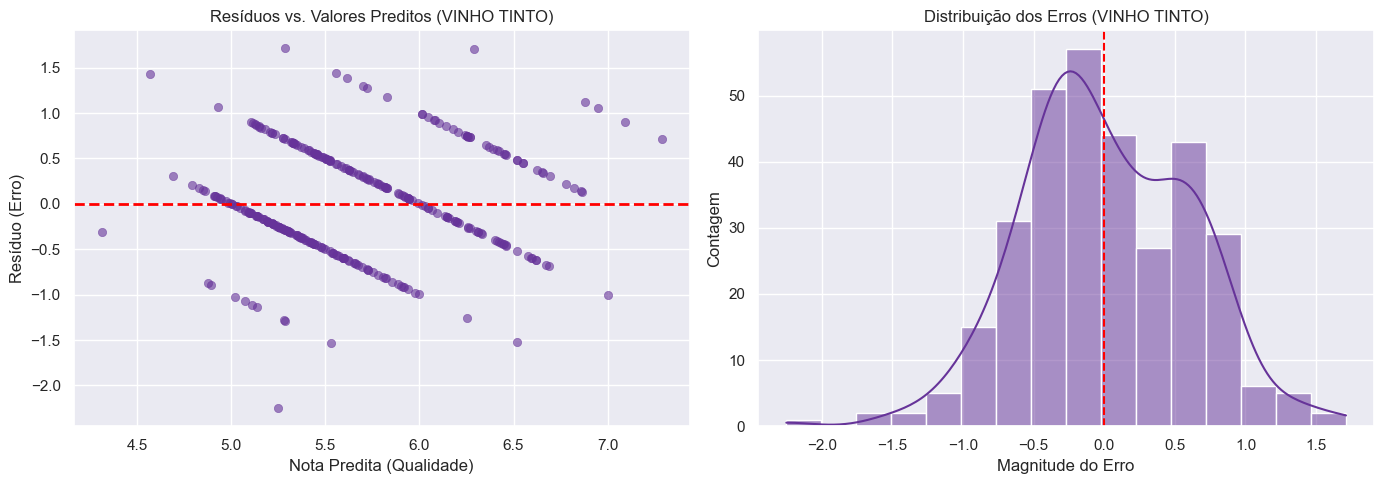

Gráficos de Resíduos: VINHO BRANCO


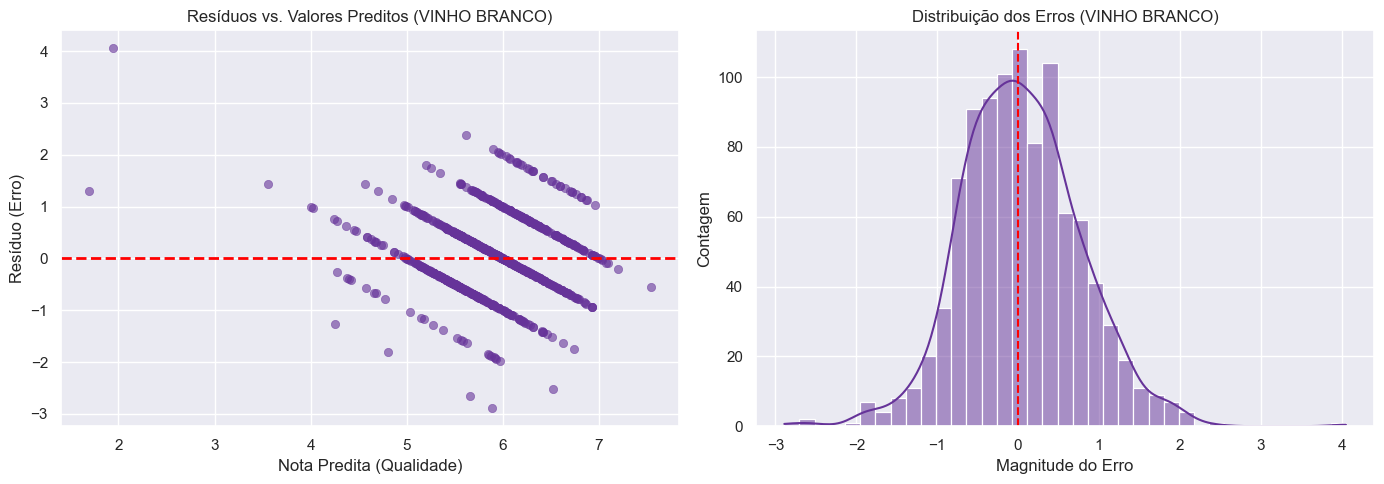

In [36]:
def plotar_analise_residual_polinomial(df, func_prep, nome_vinho, grau=2):
    print(f"Gráficos de Resíduos: {nome_vinho}")

    # Mesmo processo do treino
    X_raw, y = func_prep(df)

    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(X_raw)

    X_poly_df = pd.DataFrame(X_poly)

    X_train, X_val, X_test, y_train, y_val, y_test = dp.split_data(X_poly_df, y)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Agora sim, calculamos resíduos no teste
    y_pred = model.predict(X_test)
    residuos = y_test - y_pred

    # Plots
    plt.figure(figsize=(14, 5))

    # Gráfico A: Homocedasticidade (Resíduos vs Preditos)
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=y_pred, y=residuos, color="rebeccapurple", alpha=0.6, edgecolor=None
    )
    plt.axhline(0, color="red", linestyle="--", linewidth=2)
    plt.title(f"Resíduos vs. Valores Preditos ({nome_vinho})")
    plt.xlabel("Nota Predita (Qualidade)")
    plt.ylabel("Resíduo (Erro)")

    # Gráfico B: Normalidade (Histograma)
    plt.subplot(1, 2, 2)
    sns.histplot(residuos, kde=True, color="rebeccapurple")
    plt.axvline(0, color="red", linestyle="--")
    plt.title(f"Distribuição dos Erros ({nome_vinho})")
    plt.xlabel("Magnitude do Erro")
    plt.ylabel("Contagem")

    plt.tight_layout()
    plt.show()


plotar_analise_residual_polinomial(df, dp.prepare_features_red, "VINHO TINTO")
plotar_analise_residual_polinomial(df, dp.prepare_features_white, "VINHO BRANCO")

<span style="color: Chocolate;"> **Diagnóstico dos Resíduos:**

* <span style="color: Chocolate;"> No gráfico Resíduos vs Preditos (Scatterplot), percebe-se que a nuvem de pontos assume uma forma retangular em torno do 0, sem apresentar formas côncavas ou cônicas, o que indica que o Modelo de Grau 2 foi suficiente para identificar a não-linearidade dos dados.modelo.

<span style="color: Chocolate;"> Já os histogramas revelam uma distribuição Gaussiana e simétrica, centrada em zero, semelhantes à regressão múltipla. Isso significa que a maioria dos erros são muito pequenos e que o modelo erra com a mesma frequência para cima e para baixo, de forma não-enviesada.

<span style="color: Chocolate;"> No caso do Vinho Tinto, a curva é visivelmente mais aguda no topo do que no Vinho Branco. Isso é uma representação geométrica do RMSE, basicamente, indicando que o modelo tem muito mais certeza sobre suas previsões no vinho tinto, concentrando os erros em uma faixa estreita, enquanto no vinho branco a distribuição é mais espalhada.


### <span style="color: Chocolate;"> **Fim das Regressões**

<span style="color: Chocolate;"> A melhor foi claramente a regressão polinomial, é muito interessante perceber como a complexidade e a eficácia do método regressivo evoluíram juntos, com a pior sendo a regressão simples. 

---

## <span style="color: DarkTurquoise;"> **Naive Bayes e Classificação**

<span style="color: DarkTurquoise;"> Bibliotecas e importação dos dados:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, 
    classification_report, ConfusionMatrixDisplay
)
import sys
sys.path.append('../src')
import data_preparation as dp

### <span style="color: DarkTurquoise;"> **Classificação Binária** (Vinho Tinto vs Branco)

In [38]:
# Preparando features e target
X_binary = df.drop(["quality", "type"], axis=1)
y_binary = df["type"].map({"red": 0, 
                           "white": 1})  # 0=tinto, 1=branco

print(f"\nShape dos dados: {X_binary.shape}")
print(f"Distribuição das classes:")
print(y_binary.value_counts())
print(f"Proporção: {y_binary.value_counts(normalize=True).round(2).to_dict()}") # Calcula a proporção de vinhos tintos e brancos em relação ao total

# Split dos dados (com stratify, muito importante)
X_train_bin, X_temp_bin, y_train_bin, y_temp_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary # garante que a proporção das classes seja mantida 
)
X_val_bin, X_test_bin, y_val_bin, y_test_bin = train_test_split(
    X_temp_bin, y_temp_bin, test_size=0.5, random_state=42, stratify=y_temp_bin # garante que a proporção das classes seja mantida 
)

print(
    f"\nTreino: {X_train_bin.shape[0]} | Validação: {X_val_bin.shape[0]} | Teste: {X_test_bin.shape[0]}"
)

# Normalização (importante para Regressão Logística)
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin) # fit apenas no treino para evitar vazamento de dados
X_val_bin_scaled = scaler_bin.transform(X_val_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

# Baseline com método do outro arquivo
baseline_acc_bin, majority_class = dp.get_baseline_classification(y_train_bin, y_test_bin)
print(f"\n📊 BASELINE (Sempre prever '{['Tinto', 'Branco'][majority_class]}'):")
print(f"   Accuracy: {baseline_acc_bin:.4f}")


Shape dos dados: (6497, 14)
Distribuição das classes:
type
1    4898
0    1599
Name: count, dtype: int64
Proporção: {1: 0.75, 0: 0.25}

Treino: 4547 | Validação: 975 | Teste: 975

📊 BASELINE (Sempre prever 'Branco'):
   Accuracy: 0.7538


<span style="color: DarkTurquoise;"> Essa baseline nos diz que qualquer modelo de regressão logística para classificar entre vinho tinto e branco tem de ter uma acurácia de no mínimo superior a 75.38% para ser considerado útil. Se o modelo der menos, ele é pior do que simplesmente chutar sempre "Vinho Branco" por conta da quantidade maior destes.

---

### <span style="color: DarkTurquoise;"> **Naive Bayes e Regressão Logística**

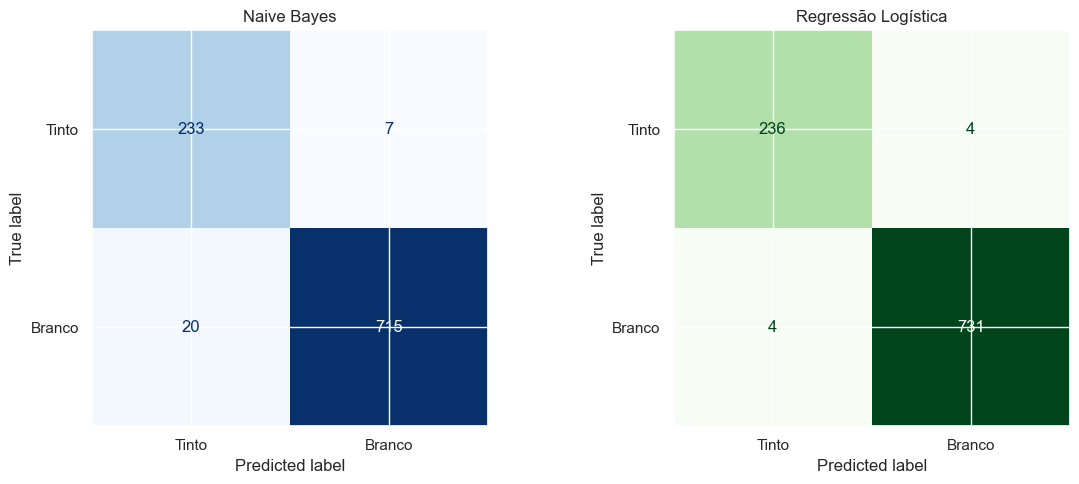

In [39]:
nb_model = GaussianNB()
log_model = LogisticRegression(random_state=42)

# Treino
nb_model.fit(X_train_bin_scaled, y_train_bin)
log_model.fit(X_train_bin_scaled, y_train_bin)

# Previsão (usando o conjunto de Validação)
y_pred_nb = nb_model.predict(X_val_bin_scaled)
y_pred_log = log_model.predict(X_val_bin_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plots
ConfusionMatrixDisplay.from_predictions(
    y_val_bin, 
    y_pred_nb, 
    display_labels=['Tinto', 'Branco'], 
    cmap='Blues',  
    ax=axes[0],    
    colorbar=False 
)
axes[0].set_title("Naive Bayes")

ConfusionMatrixDisplay.from_predictions(
    y_val_bin, 
    y_pred_log, 
    display_labels=['Tinto', 'Branco'], 
    cmap='Greens', 
    ax=axes[1],    
    colorbar=False
)
axes[1].set_title("Regressão Logística")

plt.tight_layout()
plt.show()

<span style="color: DarkTurquoise;"> Por fim, vamos analisar as métricas de acurácia:

In [40]:
def calcular_metricas(y_true, y_pred, nome_modelo):
    return {
        "Modelo": nome_modelo,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }

metricas_nb = calcular_metricas(y_val_bin, y_pred_nb, "Naive Bayes")
metricas_log = calcular_metricas(y_val_bin, y_pred_log, "Regressão Logística")

df_comparacao = pd.DataFrame([metricas_nb, metricas_log])
display(df_comparacao.round(4))

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.9723,0.9732,0.9723,0.9725
1,Regressão Logística,0.9918,0.9918,0.9918,0.9918


<span style="color: DarkTurquoise;"> As matrizes e as métricas revelaram um ótimo comportamento de ambos os modelos, com a Regressão Logística sendo ligeiramente melhor do que Naive Bayes. Nas diagonais principais das matrizes de confusão, vemos os acertos dos modelos, ou seja, quantos valores eles preveram corretamente em sua classificaçãom e na diagonal secundária quantos valores eles erraram. Ambos os modelos tiveram acurácias e precisões muito altas, acima de 95%, então estão acima da baseline por uma margem ótima e seriam excelentes para classificar um vinho baseado nestes dados.

### <span style="color: DarkTurquoise;"> **Fim da Classificação**

---

## <span style="color: ForestGreen;"> **Otimização dos Modelos**

<span style="color: ForestGreen;"> Abaixo, vou tentar otimizar os modelos usando Grid Search, começando pela regressão logística, a qual já é muito boa, mas pode ficar ainda melhor:

In [41]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Definindo parâmetros de teste
# O 'C' é a inversa da regularização.
# C pequeno (0.01) = Muita regularização (modelo mais simples, evita decorar)
# C grande (100) = Pouca regularização (modelo ajusta-se mais aos dados)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # Testando também diferentes algoritmos de cálculo
}

# cv=5 significa que ele divide os dados em 5 partes e testa 5 vezes TODAS as combinações (validação cruzada)
# Temos 10 combinações de C e solver, então são 10 * 5 = 50 iterações 
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Treino (usando os dados de TREINO, não validação)
grid_search.fit(X_train_bin_scaled, y_train_bin)

print(f"\nMelhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor acurácia na validação cruzada: {grid_search.best_score_:.4f}")

# O best_estimator_ já é o modelo treinado com os melhores parâmetros
best_model = grid_search.best_estimator_
final_acc = best_model.score(X_test_bin_scaled, y_test_bin)
print(f"Acurácia no conjunto de TESTE (final): {final_acc:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores parâmetros encontrados: {'C': 100, 'solver': 'lbfgs'}
Melhor acurácia na validação cruzada: 0.9949
Acurácia no conjunto de TESTE (final): 0.9969


<span style="color: ForestGreen;"> Conseguimos encontrar uma acurácia final de 0.9969, em comparação à 0.9918 anterior. O algoritmo mais eficiente utilizado para este caso é o L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno). O algoritmo funciona aproximando a segunda derivada (matriz Hessiana) da função alvo, ele usa uma memória limitada para estimar a curvatura da função, por isso é mais rápido, pois utiliza apenas alguns vetores gradientes. Por fim, percebemos que um modelo que se ajusta mais aos dados possui um desempenho melhor.

<span style="color: ForestGreen;"> Para encerrar, vou tentar otimizar um pouco a regressão polinomial, que foi a melhor das regressões numéricas:

In [47]:
def otimizacao_polinomail(X_train, y_train, X_test, y_test, nome_do_vinho):
    # Testando com Ridge pois quando testando diferentes graus de polinomial, ela aplica uma regularização com uma penalidade que ajuda a evitar overfitting, 
    # o qual pode acontecer pela grande quantidade de variáveis novas que o modelo pode dar importância desnecessária.
    from sklearn.linear_model import Ridge
    from sklearn.pipeline import Pipeline

    # O Pipeline junta os passos num único objeto que se comporta como um modelo, sem ele ficaria muito extenso.
    # Passo 1: Criar polinômios
    # Passo 2: Normalizar (Obrigatório para Ridge funcionar bem)
    # Passo 3: Regressão Ridge (Semelhante à linear mas com a regularização)
    pipe_poly = Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ])

    # Grade de Parâmetros
    # Sintaxe: 'nome_do_passo__parametro' (com dois underlines)
    param_grid_poly = {
        'poly__degree': [1, 2, 3, 4],           # Testando até grau 4
        'model__alpha': [0.1, 1.0, 10.0, 100.0] # Força da regularização (menor = menos penalidade)
    }

    # Grid Search
    # scoring='neg_root_mean_squared_error' porque o GridSearch tenta sempre MAXIMIZAR o score, MSE tenta minimizar, então invertemos.
    # Como queremos erro MENOR, ele usa o erro negativo.
    grid_poly = GridSearchCV(
        pipe_poly, 
        param_grid_poly, 
        cv=5, 
        scoring='neg_root_mean_squared_error',
        verbose=1

    )

    # Treino
    # Usanbdo o X_train e y_train originais da parte de Regressão (qualidade 0-10)
    print(f"Otimização da Regressão Polinomial para o {nome_do_vinho}")
    grid_poly.fit(X_train, y_train)

    # Resultados
    print(f"\nMelhor Grau: {grid_poly.best_params_['poly__degree']}")
    print(f"Melhor Regularização (Alpha): {grid_poly.best_params_['model__alpha']}")
    print(f"Melhor RMSE na Validação: {-grid_poly.best_score_:.4f}") # Note o sinal de menos para voltar a ser positivo

    # Avaliação Final 
    best_poly = grid_poly.best_estimator_
    y_pred_final = best_poly.predict(X_test)

    rmse_final = root_mean_squared_error(y_test, y_pred_final)
    print(f"RMSE Final no Teste: {rmse_final:.4f}")
    print(f"R² Final no Teste: {r2_score(y_test, y_pred_final):.4f}")


for vinho_type in ['red', 'white']:
    if vinho_type == 'red':
        X_raw, y = dp.prepare_features_red(df)
        nome = "Vinho Tinto"
    elif vinho_type == 'white':
        X_raw, y = dp.prepare_features_white(df)    
        nome = "Vinho Branco"
    
    # O Pipeline dentro da função cria os polinômios
    X_train, X_val, X_test, y_train, y_val, y_test = dp.split_data(X_raw, y)

    print(f"\nTipo do Vinho: {vinho_type}")
    otimizacao_polinomail(X_train, y_train, X_test, y_test, nome)


Tipo do Vinho: red
Otimização da Regressão Polinomial para o Vinho Tinto
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhor Grau: 2
Melhor Regularização (Alpha): 100.0
Melhor RMSE na Validação: 0.6439
RMSE Final no Teste: 0.6112
R² Final no Teste: 0.4284

Tipo do Vinho: white
Otimização da Regressão Polinomial para o Vinho Branco
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhor Grau: 3
Melhor Regularização (Alpha): 10.0
Melhor RMSE na Validação: 0.7473
RMSE Final no Teste: 0.7245
R² Final no Teste: 0.3222


<span style="color: ForestGreen;"> Vinho Tinto: A otimização concluiu que um polinómio de Grau 2 com uma regularização forte (100.0) é o melhor. O que indica que, apesar de existirem relações não-lineares entre as features e a qualidade, o modelo se beneficia de uma penalização mais alta para manter a generalização e evitar o overfitting. O desempenho final (R²≈0.43) sugere que o modelo explica cerca de 43% da variância na qualidade, um resultado consistente.

<span style="color: ForestGreen;">  Vinho Branco: O modelo percebeu que maior complexidade, selecionando o Grau 3, mas com uma regularização mais branda (10.0), é o melhor neste caso. Entretanto, o poder preditivo foi inferior ao do tinto (R²≈0.32 e RMSE mais alto), indicando que a qualidade do vinho branco é mais difícil de determinar apenas por meio destas features.

---

## <span style="color: ForestGreen;"> **Conclusões**

<span style="color: ForestGreen;"> Este projeto teve como objetivo explorar o Wine Quality Dataset para dois objetivos: a previsão da nota de qualidade (Regressões) e a identificação do tipo de vinho (Classificação). Cheguei em algumas conclusões:

<span style="color: ForestGreen;"> Classificação (Tinto vs. Branco): O modelo de Regressão Logística atingiu uma acurácia próxima de 99%, superando o Naive Bayes.

<span style="color: ForestGreen;"> Regressões (Previsão de Qualidade): Foram complexas, precisando de muitos tratamentos e ajustes para alcançar resultados satisfatórios. A Regressão Polinomial superou as demais, indicando que a relação entre as features químicas e a qualidade não é puramente linear. Apesar da otimização, o R² ficou entre 0.32 (Brancos) e 0.43 (Tintos). Ou seja, embora a química influencie na nota do vinho, a qualidade é um conceito subjetivo que provavelmente depende de fatores externos.
 
<span style="color: ForestGreen;"> Por fim, com o uso de Pipelines e GridSearchCV foi possível fazer estimativas de modelos melhores. Para os vinhos tintos, uma regularização forte (Ridge com Alpha alto) num grau polinomial menor seria foi ideal e para os brancos, o modelo mostrou mais complexidade (Grau 3). Em ambos os casos, a proximidade entre os erros de Validação e Teste demonstrou que os modelos finais são robustos e não sofrem de overfitting, produzindo resultados confiáveis dentro de suas margens de erro.